In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating environment at `~/code/FermiCG/Project.toml`


2-element Vector{String}:
 ".ipynb_checkpoints"
 "Untitled.ipynb"

In [2]:
molecule = "
He         0.52436       -0.90821        0.75187
He         0.52436        0.90821        0.75187
He        -1.04871        0.00000        0.75187
He        -1.04871        0.00000       -0.75187
He         0.52436        0.90821       -0.75187
He         0.52436       -0.90821       -0.75187
He        -0.00000       -0.00000        2.23447
He        -0.00000       -0.00000       -2.23447
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)
pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmpuq3hmbk9
max_memory 4000 MB (current use 0 MB)
init E= -23.0482779384973
  HOMO = -0.755779747611191  LUMO = 0.183352148488522
cycle= 1 E= -22.7367016476695  delta_E= 0.312  |g|= 0.045  |ddm|= 0.623
  HOMO = -0.817413108341343  LUMO = 0.18491973850656
cycle= 2 E= -22.7372654767346  delta_E= -0.000564  |g|= 0.00776  |ddm|= 0.0464
  HOMO = -0.816988702075158  LUMO = 0.185068737700195
cycle= 3 E= -22.7372856611731  delta_E= -2.02e-05  |g|= 0.000271  |ddm|= 0.0107
  HOMO = -0.817028522772401  LUMO = 0.185072729473832
cycle= 4 E= -22.7372856889721  delta_E= -2.78e-08  |g|= 2.88e-05  |ddm|= 0.000598
  HOMO = -0

    8

    He       0.5505780000000001      -0.9536205000000000       0.7894635000000001 
    He       0.5505780000000001       0.9536205000000000       0.7894635000000001 
    He      -1.1011455000000001       0.0000000000000000       0.7894635000000001 
    He      -1.1011455000000001       0.0000000000000000      -0.7894635000000001 
    He       0.5505780000000001       0.9536205000000000      -0.7894635000000001 
    He       0.5505780000000001      -0.9536205000000000      -0.7894635000000001 
    He      -0.0000000000000000      -0.0000000000000000       2.3461935000000000 
    He      -0.0000000000000000      -0.0000000000000000      -2.3461935000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF r

 Hartree-Fock Energy: -22.81904874E(CCSD) = -23.09378631326269  E_corr = -0.2747375768869039
CCSD total energy    -23.09378631
CCSD(T) correction = -0.000289540280178766
CCSD(T) total energy -23.09407585
    8

    He       0.6554500000000001      -1.1352625000000001       0.9398375000000001 
    He       0.6554500000000001       1.1352625000000001       0.9398375000000001 
    He      -1.3108875000000000       0.0000000000000000       0.9398375000000001 
    He      -1.3108875000000000       0.0000000000000000      -0.9398375000000001 
    He       0.6554500000000001       1.1352625000000001      -0.9398375000000001 
    He       0.6554500000000001      -1.1352625000000001      -0.9398375000000001 
    He      -0.0000000000000000      -0.0000000000000000       2.7930874999999999 
    He      -0.0000000000000000      -0.0000000000000000      -2.7930874999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.83937529E(CCSD) = -23.1123385894742  E_corr = -0.2729633006035126
CCSD total energy    -23.11233859
CCSD(T) correction = -0.00014354565835165
CCSD(T) total energy -23.11248214
    8

    He       0.7603220000000001      -1.3169044999999999       1.0902115000000001 
    He       0.7603220000000001       1.3169044999999999       1.0902115000000001 
    He      -1.5206295000000001       0.0000000000000000       1.0902115000000001 
    He      -1.5206295000000001       0.0000000000000000      -1.0902115000000001 
    He       0.7603220000000001       1.3169044999999999      -1.0902115000000001 
    He       0.7603220000000001      -1.3169044999999999      -1.0902115000000001 
    He      -0.0000000000000000      -0.0000000000000000       3.2399814999999998 
    He      -0.0000000000000000      -0.0000000000000000      -3.2399814999999998 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DI

 Hartree-Fock Energy: -22.84432406E(CCSD) = -23.116296877245  E_corr = -0.2719728157181953
CCSD total energy    -23.11629688
CCSD(T) correction = -7.01044571907881e-05
CCSD(T) total energy -23.11636698
    8

    He       0.8651940000000000      -1.4985464999999998       1.2405854999999999 
    He       0.8651940000000000       1.4985464999999998       1.2405854999999999 
    He      -1.7303715000000000       0.0000000000000000       1.2405854999999999 
    He      -1.7303715000000000       0.0000000000000000      -1.2405854999999999 
    He       0.8651940000000000       1.4985464999999998      -1.2405854999999999 
    He       0.8651940000000000      -1.4985464999999998      -1.2405854999999999 
    He      -0.0000000000000000      -0.0000000000000000       3.6868754999999998 
    He      -0.0000000000000000      -0.0000000000000000      -3.6868754999999998 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DI

 Hartree-Fock Energy: -22.84541814E(CCSD) = -23.11684419591797  E_corr = -0.2714260568683126
CCSD total energy    -23.11684420
CCSD(T) correction = -3.51773128745766e-05
CCSD(T) total energy -23.11687937
    8

    He       0.9700660000000001      -1.6801885000000001       1.3909595000000001 
    He       0.9700660000000001       1.6801885000000001       1.3909595000000001 
    He      -1.9401135000000000       0.0000000000000000       1.3909595000000001 
    He      -1.9401135000000000       0.0000000000000000      -1.3909595000000001 
    He       0.9700660000000001       1.6801885000000001      -1.3909595000000001 
    He       0.9700660000000001      -1.6801885000000001      -1.3909595000000001 
    He      -0.0000000000000000      -0.0000000000000000       4.1337695000000005 
    He      -0.0000000000000000      -0.0000000000000000      -4.1337695000000005 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84562284E(CCSD) = -23.11675519683087  E_corr = -0.2711323599202383
CCSD total energy    -23.11675520
CCSD(T) correction = -1.85362759051052e-05
CCSD(T) total energy -23.11677373
    8

    He       1.0749379999999999      -1.8618304999999997       1.5413334999999999 
    He       1.0749379999999999       1.8618304999999997       1.5413334999999999 
    He      -2.1498554999999997       0.0000000000000000       1.5413334999999999 
    He      -2.1498554999999997       0.0000000000000000      -1.5413334999999999 
    He       1.0749379999999999       1.8618304999999997      -1.5413334999999999 
    He       1.0749379999999999      -1.8618304999999997      -1.5413334999999999 
    He      -0.0000000000000000      -0.0000000000000000       4.5806634999999991 
    He      -0.0000000000000000      -0.0000000000000000      -4.5806634999999991 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564806E(CCSD) = -23.1166204750021  E_corr = -0.2709724183848677
CCSD total energy    -23.11662048
CCSD(T) correction = -1.03199754986169e-05
CCSD(T) total energy -23.11663079
    8

    He       1.1798100000000000      -2.0434725000000000       1.6917075000000001 
    He       1.1798100000000000       2.0434725000000000       1.6917075000000001 
    He      -2.3595975000000000       0.0000000000000000       1.6917075000000001 
    He      -2.3595975000000000       0.0000000000000000      -1.6917075000000001 
    He       1.1798100000000000       2.0434725000000000      -1.6917075000000001 
    He       1.1798100000000000      -2.0434725000000000      -1.6917075000000001 
    He      -0.0000000000000000      -0.0000000000000000       5.0275575000000003 
    He      -0.0000000000000000      -0.0000000000000000      -5.0275575000000003 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84564398E(CCSD) = -23.11652691227947  E_corr = -0.2708829283606946
CCSD total energy    -23.11652691
CCSD(T) correction = -6.05428260040554e-06
CCSD(T) total energy -23.11653297
    8

    He       1.2846820000000001      -2.2251145000000001       1.8420815000000001 
    He       1.2846820000000001       2.2251145000000001       1.8420815000000001 
    He      -2.5693395000000003       0.0000000000000000       1.8420815000000001 
    He      -2.5693395000000003       0.0000000000000000      -1.8420815000000001 
    He       1.2846820000000001       2.2251145000000001      -1.8420815000000001 
    He       1.2846820000000001      -2.2251145000000001      -1.8420815000000001 
    He      -0.0000000000000000      -0.0000000000000000       5.4744515000000007 
    He      -0.0000000000000000      -0.0000000000000000      -5.4744515000000007 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564024E(CCSD) = -23.11647152961478  E_corr = -0.2708312865038509
CCSD total energy    -23.11647153
CCSD(T) correction = -3.71779075937638e-06
CCSD(T) total energy -23.11647525
    8

    He       1.3895540000000004      -2.4067565000000002       1.9924555000000004 
    He       1.3895540000000004       2.4067565000000002       1.9924555000000004 
    He      -2.7790815000000006       0.0000000000000000       1.9924555000000004 
    He      -2.7790815000000006       0.0000000000000000      -1.9924555000000004 
    He       1.3895540000000004       2.4067565000000002      -1.9924555000000004 
    He       1.3895540000000004      -2.4067565000000002      -1.9924555000000004 
    He      -0.0000000000000000      -0.0000000000000000       5.9213455000000010 
    He      -0.0000000000000000      -0.0000000000000000      -5.9213455000000010 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563877E(CCSD) = -23.11643944055044  E_corr = -0.2708006684051208
CCSD total energy    -23.11643944
CCSD(T) correction = -2.37271829178501e-06
CCSD(T) total energy -23.11644181
    8

    He       1.4944260000000003      -2.5883984999999998       2.1428295000000004 
    He       1.4944260000000003       2.5883984999999998       2.1428295000000004 
    He      -2.9888235000000001       0.0000000000000000       2.1428295000000004 
    He      -2.9888235000000001       0.0000000000000000      -2.1428295000000004 
    He       1.4944260000000003       2.5883984999999998      -2.1428295000000004 
    He       1.4944260000000003      -2.5883984999999998      -2.1428295000000004 
    He      -0.0000000000000000      -0.0000000000000000       6.3682395000000005 
    He      -0.0000000000000000      -0.0000000000000000      -6.3682395000000005 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563810E(CCSD) = -23.116420354633  E_corr = -0.2707822506852859
CCSD total energy    -23.11642035
CCSD(T) correction = -1.5643167364063e-06
CCSD(T) total energy -23.11642192


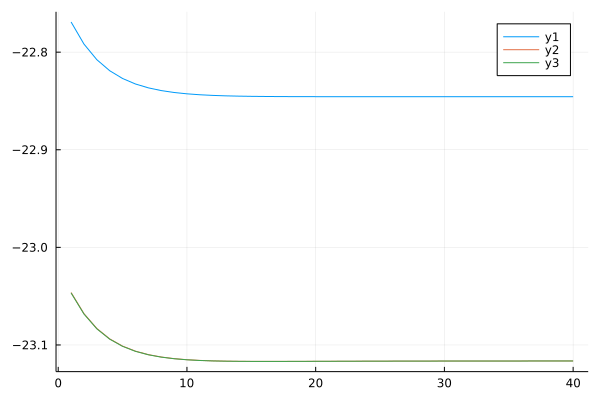

In [3]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()
    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])

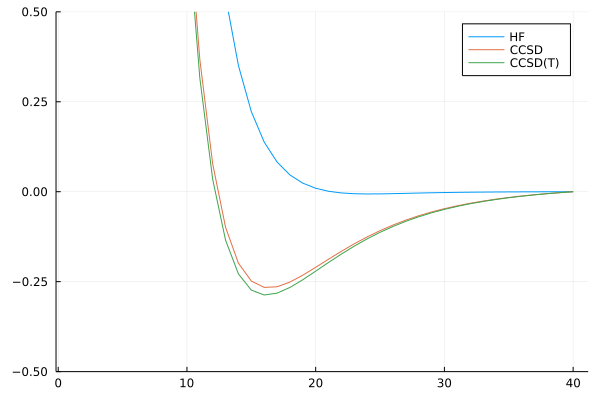

In [4]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))